In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
quandl.ApiConfig.api_key = 'oZexcxKbDYrdJj6BHa-W'

In [4]:
path = r"C:\Users\ryani\Desktop\Data Analyst COURSE\Data Immersion\E6 - Dashboards and Analytics\UN_DATASET"

In [5]:
df_UN = pd.read_csv(os.path.join(path, '01 Original Data', 'WPP2024_Demographic_Indicators_Medium.csv'))
df_UN

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
0,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,654.5798,631.8067,297.6529,298.4483,297.2079,443.3215,457.3384,427.3167,201.196,2.907
1,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,642.5944,619.1788,292.4375,293.1236,292.0887,436.9979,451.4368,420.7398,195.070,2.760
2,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,630.8166,607.6061,286.6916,287.3395,286.3341,429.8298,444.5151,413.5565,182.671,2.529
3,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,619.9937,596.2667,281.4671,282.0251,281.1446,423.2008,438.1189,406.9265,164.189,2.222
4,NaN,5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADB region: Central and West Asia,...,610.3878,586.3428,276.8312,277.5799,276.2557,417.3453,432.7454,400.7629,163.064,2.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84355,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,29.4343,35.8025,9.6232,8.1477,11.1791,26.9260,25.8335,28.0762,-0.001,-0.126
84356,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,29.0008,35.3848,9.4943,8.0242,11.0440,26.5634,25.4456,27.7401,-0.001,-0.103
84357,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,28.5670,34.9669,9.3653,7.9008,10.9090,26.2007,25.0576,27.4040,-0.001,-0.109
84358,326.0,876,2.0,WLF,WF,876.0,4.0,Country/Area,957.0,Wallis and Futuna Islands,...,28.3501,34.5488,9.2681,7.8390,10.7740,25.9376,24.8635,27.0678,-0.001,-0.168


In [6]:
df_Europe = df_UN[df_UN['Location'] == 'Europe']
df_Europe

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,...,Q0060Male,Q0060Female,Q1550,Q1550Male,Q1550Female,Q1560,Q1560Male,Q1560Female,NetMigrations,CNMR
62472,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,353.6876,259.2904,113.7148,137.1627,93.5514,211.0730,260.3320,169.9402,-539.881,-0.984
62473,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,352.3274,257.6760,110.9422,134.3936,90.6420,209.0334,258.8543,167.2798,-683.792,-1.235
62474,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,332.7601,240.3173,103.7168,125.9403,84.3928,199.7563,247.9858,159.2915,-597.653,-1.070
62475,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,321.9274,227.8945,99.0243,121.3873,79.4467,194.3109,243.0988,153.1508,-171.775,-0.304
62476,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,309.0329,215.8750,91.6128,113.2517,72.6255,184.6519,232.7595,143.9383,-316.279,-0.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62619,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,50.1700,19.5517,14.8831,21.4719,7.9853,34.1169,48.8937,18.6645,830.719,1.391
62620,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,49.5093,19.1796,14.6419,21.1513,7.8272,33.6136,48.2484,18.3094,841.945,1.414
62621,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,48.8423,18.8201,14.4060,20.8350,7.6753,33.1133,47.5978,17.9660,822.153,1.384
62622,183.0,908,NaN,NaN,NaN,150.0,2.0,Geographic region,1840.0,Europe,...,48.1678,18.4498,14.1714,20.5241,7.5206,32.6038,46.9392,17.6122,807.624,1.364


In [7]:
df_EU_mig = df_Europe[['Time', 'CNMR']]
df_EU_mig

,Time,CNMR
62472,1950,-0.984
62473,1951,-1.235
62474,1952,-1.070
62475,1953,-0.304
62476,1954,-0.555
...,...,...
62619,2097,1.391
62620,2098,1.414
62621,2099,1.384
62622,2100,1.364


In [8]:
df_mig = df_EU_mig[df_EU_mig['Time'] <2024]
df_mig

,Time,CNMR
62472,1950,-0.984
62473,1951,-1.235
62474,1952,-1.070
62475,1953,-0.304
62476,1954,-0.555
...,...,...
62541,2019,2.461
62542,2020,1.947
62543,2021,2.256
62544,2022,0.017


In [9]:
df_mig.shape

(74, 2)

In [10]:
df_mig.columns

Index(['Time', 'CNMR'], dtype='object')

In [11]:
df_mig = df_mig.reset_index()
df_mig

,index,Time,CNMR
0,62472,1950,-0.984
1,62473,1951,-1.235
2,62474,1952,-1.070
3,62475,1953,-0.304
4,62476,1954,-0.555
...,...,...,...
69,62541,2019,2.461
70,62542,2020,1.947
71,62543,2021,2.256
72,62544,2022,0.017


In [12]:
df_mig = df_mig.drop(columns = ['index'])
df_mig

,Time,CNMR
0,1950,-0.984
1,1951,-1.235
2,1952,-1.070
3,1953,-0.304
4,1954,-0.555
...,...,...
69,2019,2.461
70,2020,1.947
71,2021,2.256
72,2022,0.017


In [13]:
# Set the "Date" column as the index

df_mig = df_mig.set_index('Time') # Set the datetime as the index of the dataframe.
df_mig.head()

,CNMR
Time,
1950,-0.984
1951,-1.235
1952,-1.070
1953,-0.304
1954,-0.555


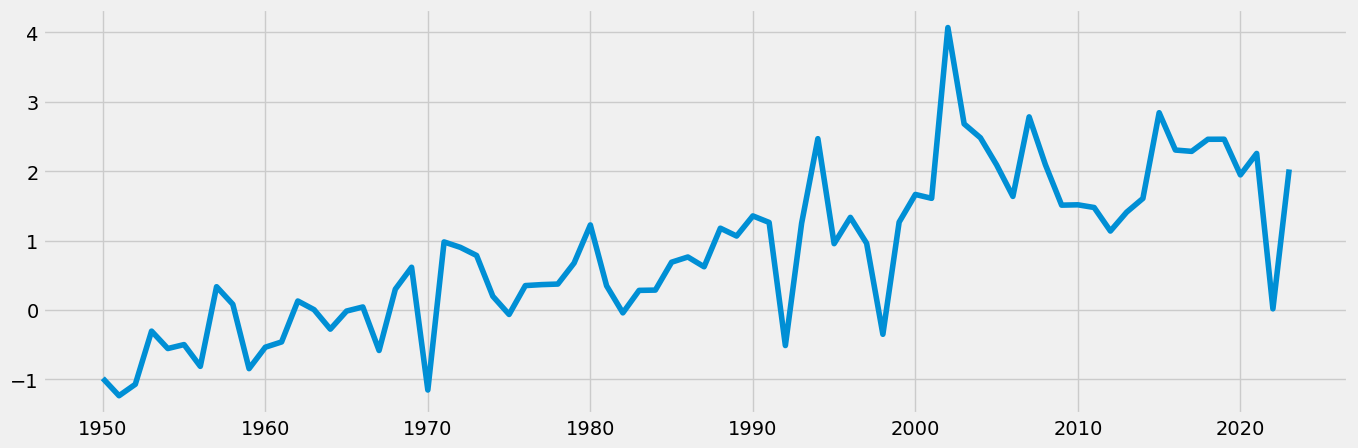

In [14]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_mig)

In [18]:
df_EU_mig = df_mig.rename(columns={'CNMR' : 'EU Migration Rate'})
df_EU_mig

,EU Migration Rate
Time,
1950,-0.984
1951,-1.235
1952,-1.070
1953,-0.304
1954,-0.555
...,...
2019,2.461
2020,1.947
2021,2.256


In [20]:
df_EU_mig = df_EU_mig.rename_axis("Year")
df_EU_mig

,EU Migration Rate
Year,
1950,-0.984
1951,-1.235
1952,-1.070
1953,-0.304
1954,-0.555
...,...
2019,2.461
2020,1.947
2021,2.256


In [23]:
df_EU_mig.index = pd.to_datetime(df_EU_mig.index, format='%Y')
df_EU_mig

,EU Migration Rate
Year,
1950-01-01,-0.984
1951-01-01,-1.235
1952-01-01,-1.070
1953-01-01,-0.304
1954-01-01,-0.555
...,...
2019-01-01,2.461
2020-01-01,1.947
2021-01-01,2.256


## My thinking on choosing this data was to:

## - 1. Continue with my original dataset as it already had a historical component going back to the 1950s. Removing the forecasted Data after 2024. 
## - 2. Choosing Migration Rate as I thought it may be interesting

In [24]:
df_EU_mig.isnull().sum() 

EU Migration Rate    0
dtype: int64

In [25]:
decomposition = sm.tsa.seasonal_decompose(df_EU_mig, model='additive')

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

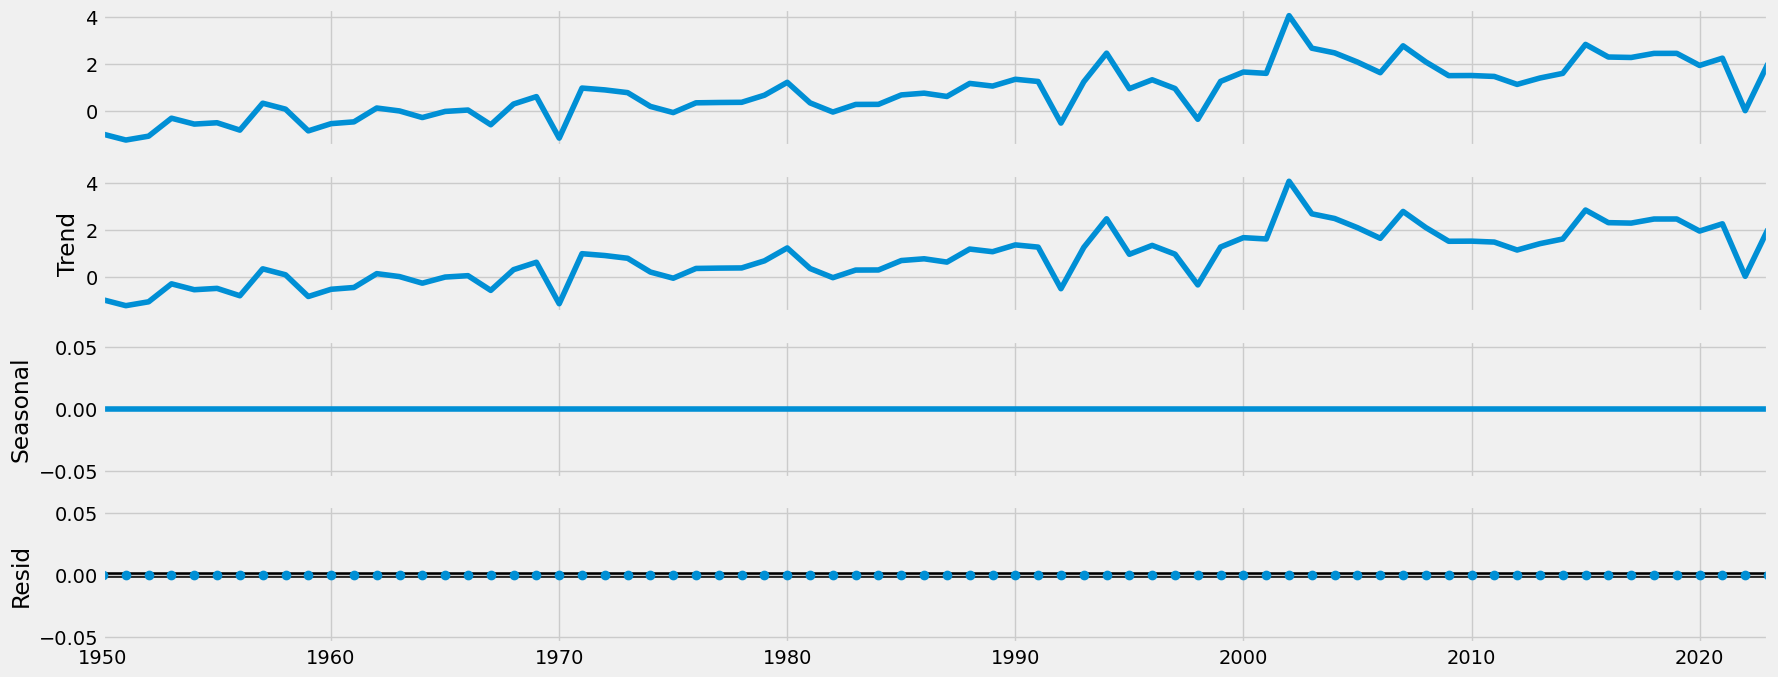

In [27]:
# Plot the separate components

decomposition.plot()
plt.show()

## The data does not seem to be very noisy and so the first two charts appear identical. As my data is from a yearly-record, there is no seasonality - so we have a straight line. Finally since we have no noise or seasonality, we again have a straight line.

In [29]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_EU_mig['EU Migration Rate'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.645276
p-value                         0.459505
Number of Lags Used             4.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64


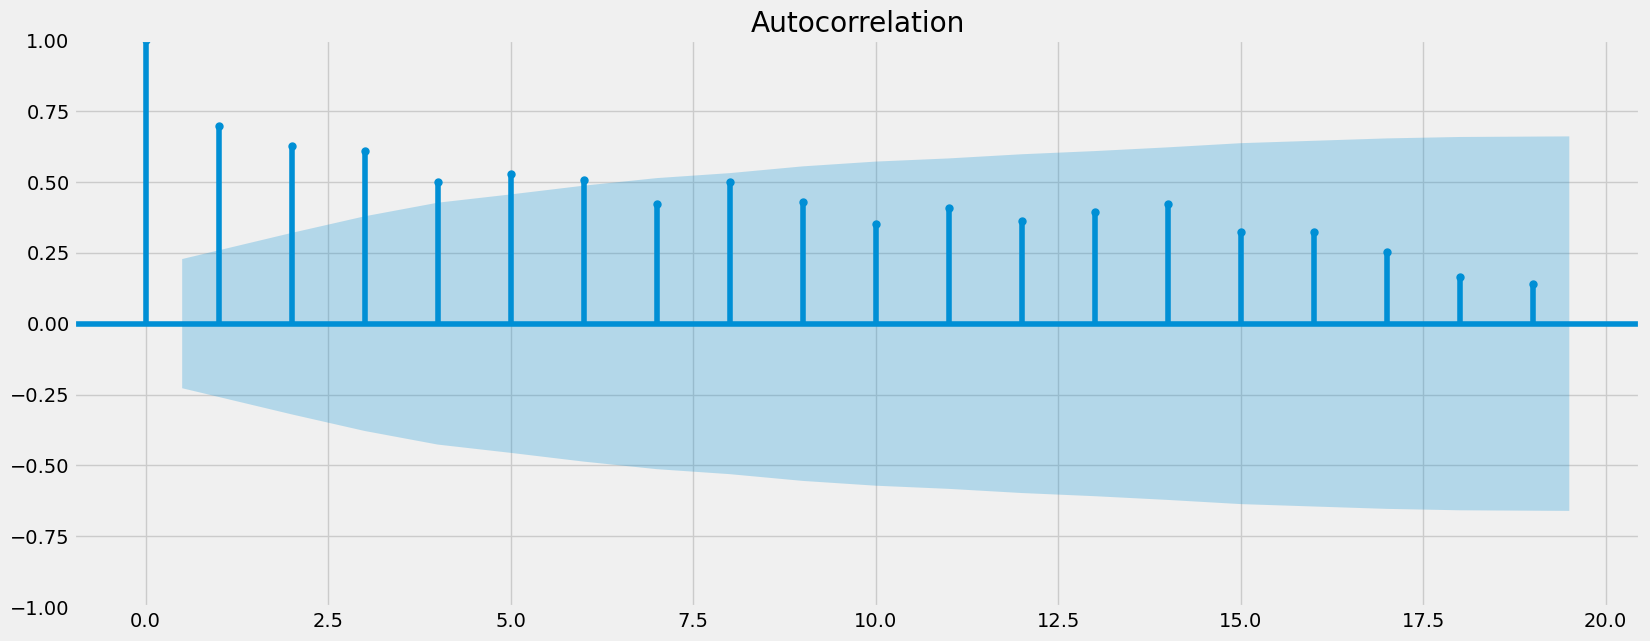

In [30]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_EU_mig)
plt.show()

# This data has a trend, which looked very evident and has now been proven statistically. I will try and stationarize the data with differencing.

In [32]:
df_EU_diff = df_EU_mig - df_EU_mig.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

df_EU_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

df_EU_diff.head()

,EU Migration Rate
Year,
1951-01-01,-0.251
1952-01-01,0.165
1953-01-01,0.766
1954-01-01,-0.251
1955-01-01,0.057


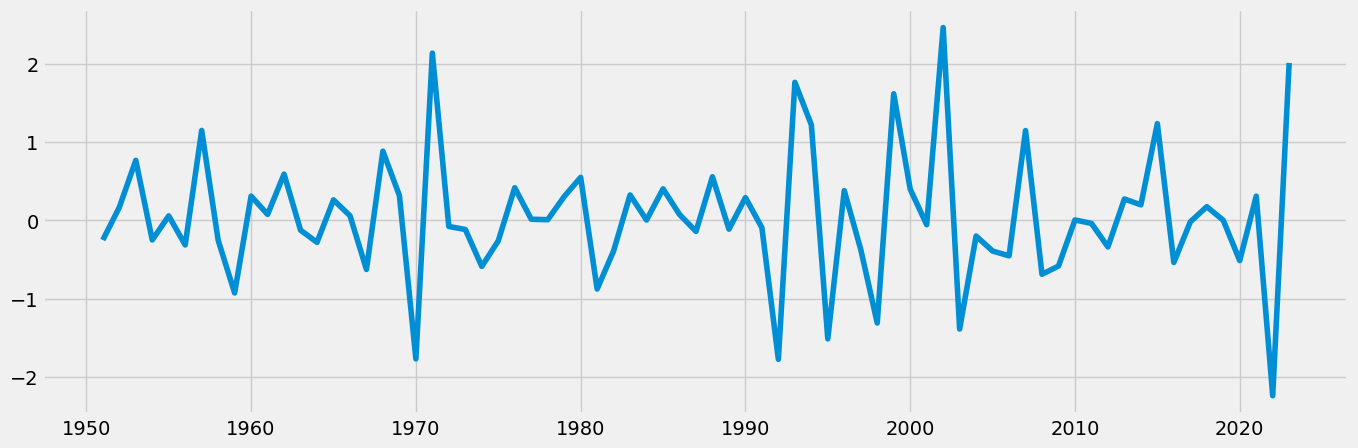

In [33]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_EU_diff)

In [35]:
dickey_fuller(df_EU_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.419225
p-value                         0.000003
Number of Lags Used             6.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


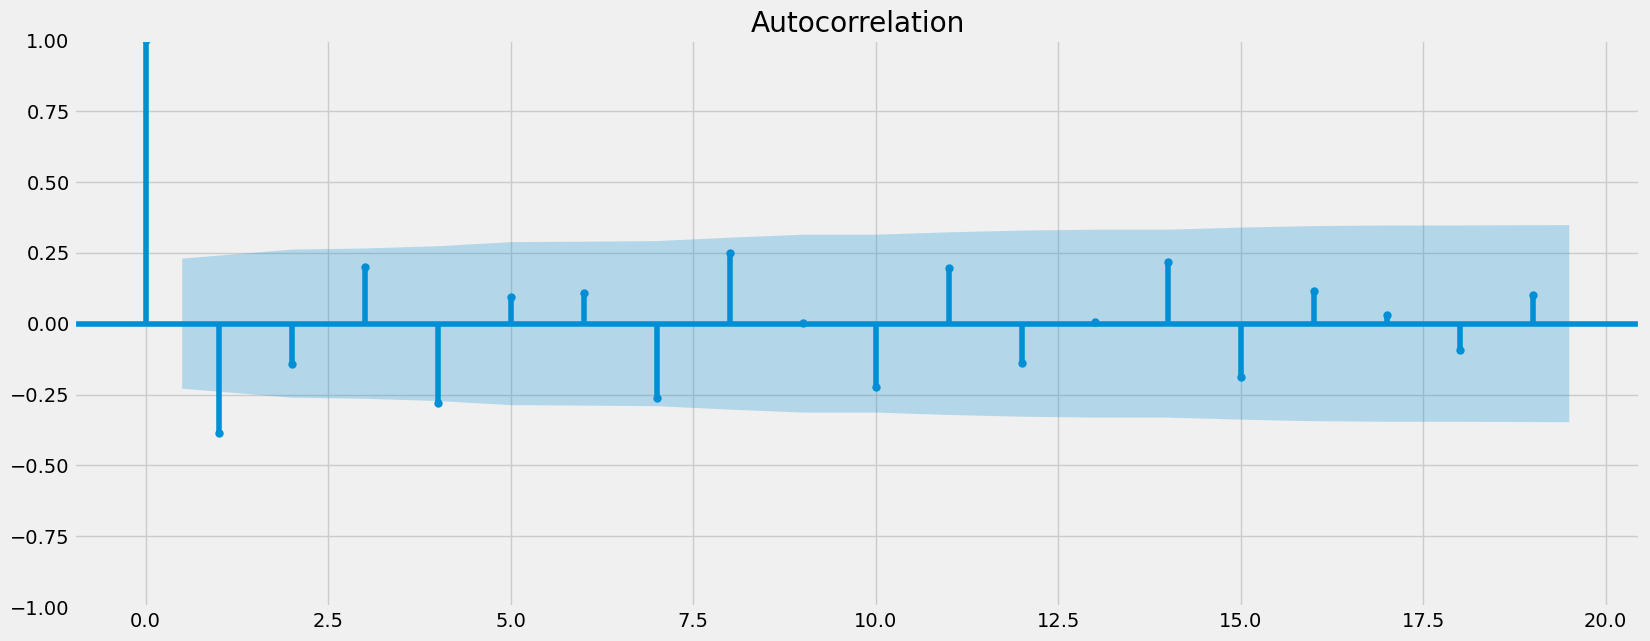

In [37]:
plot_acf(df_EU_diff)
plt.show()

## The apperance of the raw data and the Dickey Fuller Analyses indicate a stationary dataset now as the Test Statistic is smaller than the 10%, 5% and even 1% Critical Value with incredibly small p-value. 

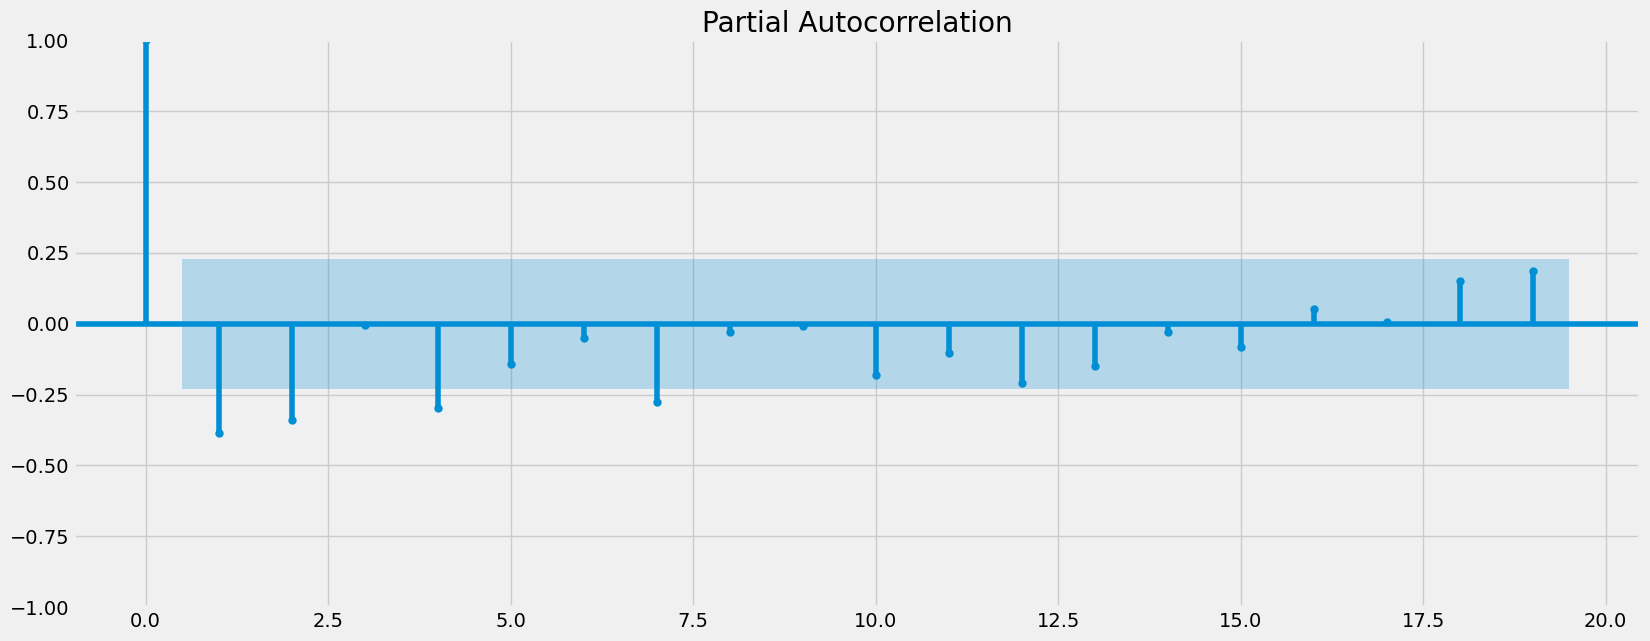

<Figure size 4500x4500 with 0 Axes>

In [38]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(df_EU_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

Five bars outside, max at 1 ... p at 1?

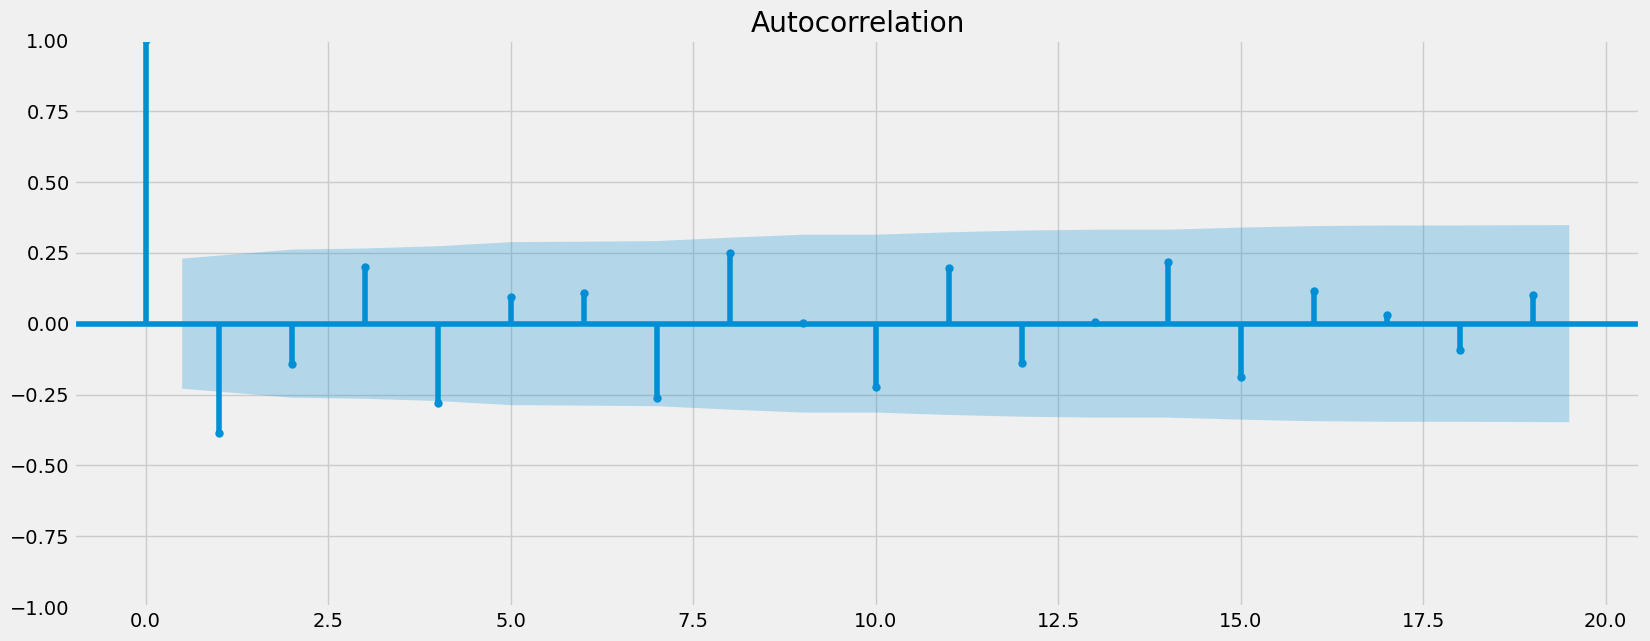

<Figure size 1500x500 with 0 Axes>

In [39]:
# Plot autocorrelations to determine parameter q

plot_acf(df_EU_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

# BONUS

In [95]:
# Split the data

train = df_EU_diff['EU Migration Rate'][:55]
test = df_EU_diff['EU Migration Rate'][55:]

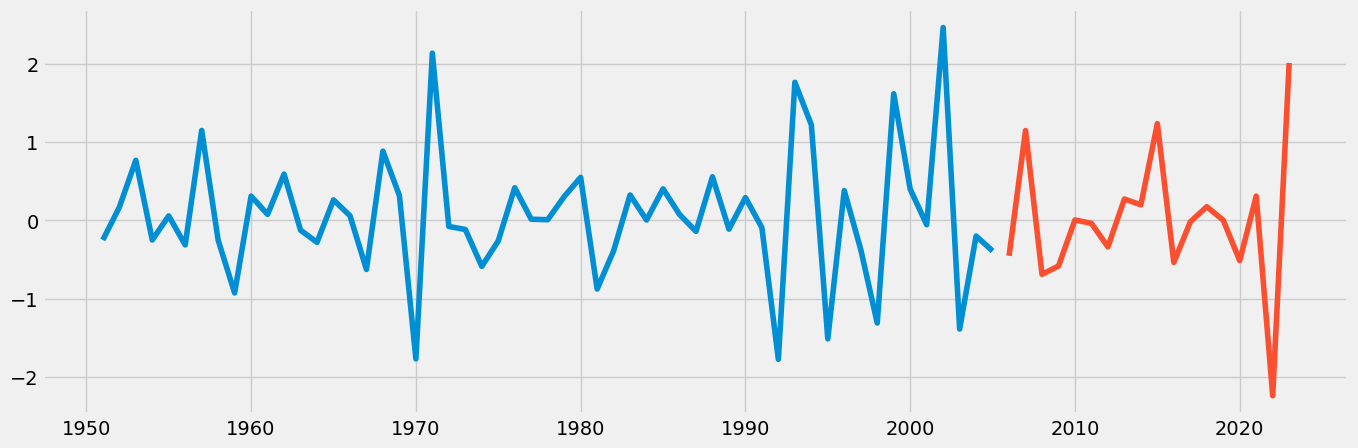

In [96]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [97]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [160]:
test.shape

(18,)

                               SARIMAX Results                                
Dep. Variable:      EU Migration Rate   No. Observations:                   55
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 -60.081
Date:                Tue, 05 Aug 2025   AIC                            134.161
Time:                        14:46:25   BIC                            148.084
Sample:                    01-01-1951   HQIC                           139.531
                         - 01-01-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5456      0.198     -7.813      0.000      -1.933      -1.158
ar.L2         -1.3498      0.262     -5.158      0.000      -1.863      -0.837
ar.L3         -0.2851      0.200     -1.428      0.1

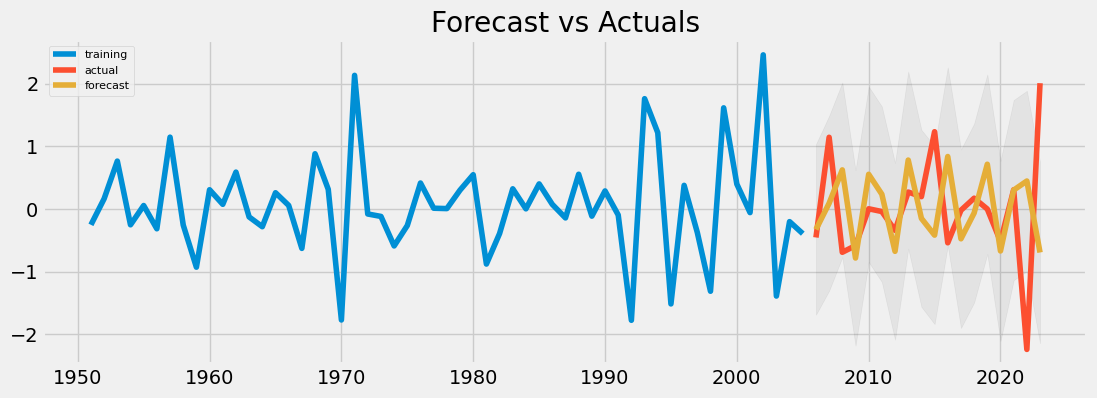

In [284]:
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
# In newer versions of statsmodels, forecast() returns only the predicted values
fc = fitted.forecast(18)  # 18 is the shape of the test set

# For confidence intervals, we need to use get_forecast()
forecast_object = fitted.get_forecast(18)
conf = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Not happy with the p values for the ma, too high

                               SARIMAX Results                                
Dep. Variable:      EU Migration Rate   No. Observations:                   55
Model:                 ARIMA(8, 2, 3)   Log Likelihood                 -57.782
Date:                Tue, 05 Aug 2025   AIC                            139.564
Time:                        14:48:58   BIC                            163.207
Sample:                    01-01-1951   HQIC                           148.656
                         - 01-01-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5754      0.290     -5.434      0.000      -2.144      -1.007
ar.L2         -1.3359      0.458     -2.919      0.004      -2.233      -0.439
ar.L3         -1.2180      0.578     -2.107      0.0

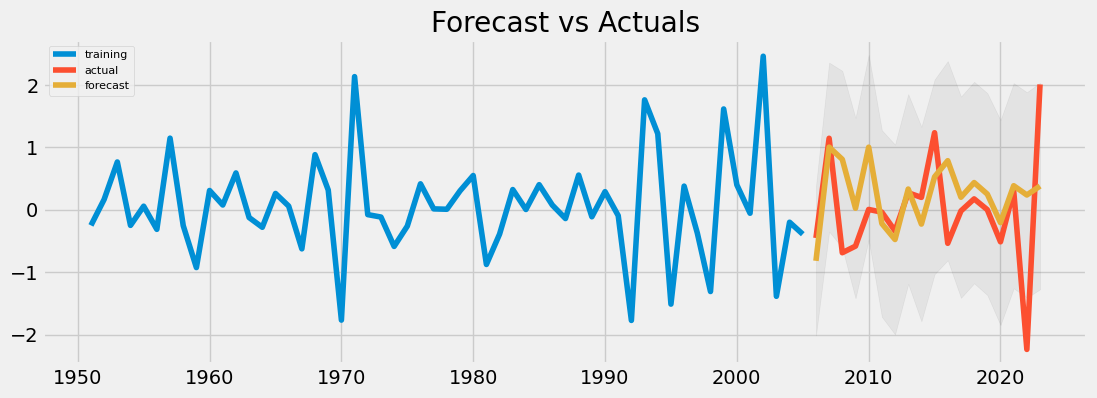

In [288]:
model = ARIMA(train, order=(8, 2, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
# In newer versions of statsmodels, forecast() returns only the predicted values
fc = fitted.forecast(18)  # 18 is the shape of the test set

# For confidence intervals, we need to use get_forecast()
forecast_object = fitted.get_forecast(18)
conf = forecast_object.conf_int(alpha=0.05)  # 95% confidence interval

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## FInal choice to try and get the p values for ma as low as possible